# Лабораторная работа №1 
## Вариант 3
### Выполнил студент группы 17-АСВ Борисов Дмитрий
Задание:
Вторичный рынок машин
1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [1]:
import pandas as pd
%matplotlib inline
cars_df = pd.read_csv('autos.csv', encoding='iso-8859-1')

In [2]:
cars_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### 1. Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [3]:
evaluation_df = cars_df.drop(['dateCrawled','seller','offerType','abtest','dateCreated','nrOfPictures','postalCode','lastSeen'], axis='columns')

In [4]:
evaluation_df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


### 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [5]:
print("Размер набора данных до удаления повторяющихся строк",evaluation_df.shape[0])
deldupl_df = cars_df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])
print("Размер данных после удаления повторяющихся строк",deldupl_df.shape[0])
deldupl_null = deldupl_df.dropna()
print("Размер набора данных после удаления дубликатов и пустых строк",deldupl_null.shape[0])

Размер набора данных до удаления повторяющихся строк 371528
Размер данных после удаления повторяющихся строк 362770
Размер набора данных после удаления дубликатов и пустых строк 254921


### 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

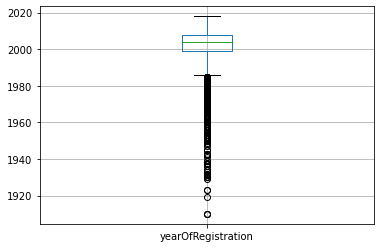

In [6]:
boxplot1 = deldupl_null.boxplot(column=['yearOfRegistration'])

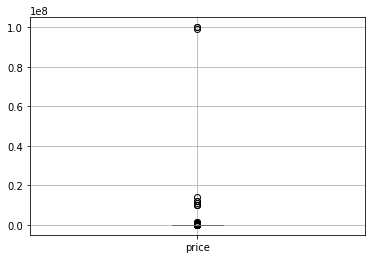

In [7]:
boxplot2 = deldupl_null.boxplot(column=['price'])

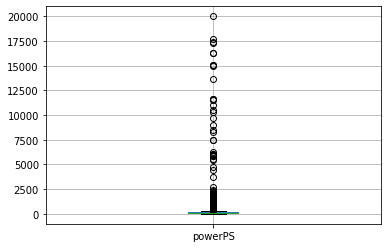

In [8]:
boxplot3 = deldupl_null.boxplot(column=['powerPS'])

In [9]:
autocars_df  = deldupl_null[
    (deldupl_null.yearOfRegistration <= 2015)&
    (deldupl_null.yearOfRegistration >= 1980)&
    (deldupl_null.price >= 0)&
    (deldupl_null.price <= 0.5)&
    (deldupl_null.powerPS >= 0)&
    (deldupl_null.powerPS <= 10000)
]
print("Размер набора данных до применения фильтра", deldupl_null.shape[0]) 
print("Размер набора данных после применения фильтра", autocars_df.shape[0])

Размер набора данных до применения фильтра 254921
Размер набора данных после применения фильтра 3124


### 4. Заполнить пропущенные данные в строковых полях.

In [10]:
deldupl_df.isnull().sum() ##Сумма пустых атрибутов

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37380
yearOfRegistration         0
gearbox                19102
powerPS                    0
model                  20260
kilometer                  0
monthOfRegistration        0
fuelType               33047
brand                      0
notRepairedDamage      70197
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [11]:
deldupl_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [12]:
not_empty_df = deldupl_df
not_empty_df['name'].fillna(value='not_empty', inplace=True)
not_empty_df['seller'].fillna(value='not_empty', inplace=True)
not_empty_df['offerType'].fillna(value='not_empty', inplace=True)
not_empty_df['abtest'].fillna(value='not_empty', inplace=True)
not_empty_df['vehicleType'].fillna(value='not_empty', inplace=True)
not_empty_df['gearbox'].fillna(value='not_empty', inplace=True)
not_empty_df['model'].fillna(value='not_empty', inplace=True)
not_empty_df['fuelType'].fillna(value='not_empty', inplace=True)
not_empty_df['brand'].fillna(value='not_emptye', inplace=True)
not_empty_df['notRepairedDamage'].fillna(value='not_empty', inplace=True)

not_empty_df

/home/playjim/my_project_dir/my_project_env/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,not_empty,1993,manuell,0,golf,150000,0,benzin,volkswagen,not_empty,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,not_empty,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,not_empty,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,not_empty,2005,not_empty,0,not_empty,20000,1,not_empty,sonstige_autos,not_empty,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,not_empty,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [13]:
not_empty_df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

### 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

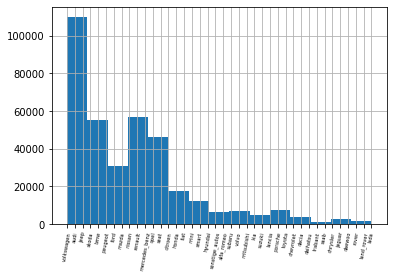

In [14]:
deldupl_df.brand.hist(xrot=80,bins=15,xlabelsize=5)

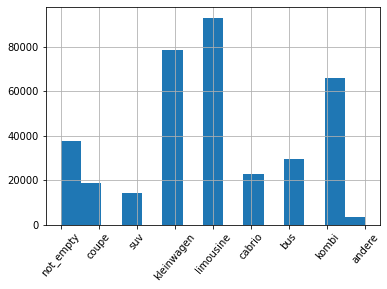

In [15]:
deldupl_df.vehicleType.hist(xrot=50,bins=15,xlabelsize=10)

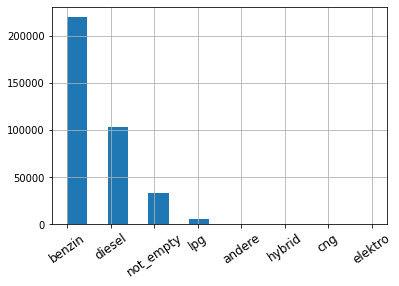

In [16]:
deldupl_df.fuelType.hist(xrot=35,bins=15,xlabelsize=12)

### 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [17]:
deldupl_df['len_name'] = [len(i) for i in deldupl_df['name']]
#deldupl_df = deldupl_df.drop(['len','len_name'], axis='columns')

/home/playjim/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
deldupl_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,len_name
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,not_empty,1993,manuell,0,...,150000,0,benzin,volkswagen,not_empty,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,10
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,20
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,not_empty,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,30
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,not_empty,2005,not_empty,0,...,20000,1,not_empty,sonstige_autos,not_empty,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52,26
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,37
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,34
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,not_empty,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21,22


### 7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,len_name
price,1.000000,-0.000184,0.006852,-0.000622,-0.002853,NaN,-0.003223,-0.000050
yearOfRegistration,-0.000184,1.000000,0.000454,-0.055157,-0.011581,NaN,-0.001386,0.002036
powerPS,0.006852,0.000454,1.000000,-0.008877,0.044365,NaN,0.027794,0.009842
kilometer,-0.000622,-0.055157,-0.008877,1.000000,0.002872,NaN,-0.029992,-0.020382
monthOfRegistration,-0.002853,-0.011581,0.044365,0.002872,1.000000,NaN,0.016596,0.013794
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003223,-0.001386,0.027794,-0.029992,0.016596,NaN,1.000000,-0.011086
len_name,-0.000050,0.002036,0.009842,-0.020382,0.013794,NaN,-0.011086,1.000000


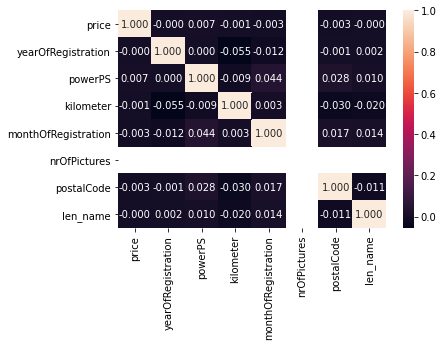

In [19]:
import seaborn as sns

sns.heatmap(deldupl_df.corr(), annot=True,fmt=".3f")
deldupl_df.corr()

### 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.

Коэффициент корреляции Пирсона:  (-0.0040963480994792795, 0.013615589694925555)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.05799664878928414, pvalue=8.838847580171956e-268)
p-value is normal


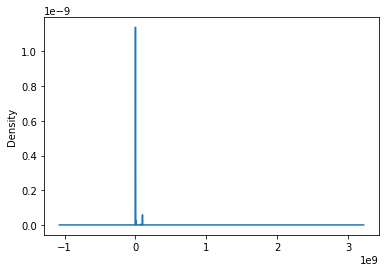

In [21]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

spearman=spearmanr(deldupl_df['price'],pd.Series(LabelEncoder().fit_transform(deldupl_df['vehicleType'])))

print("Коэффициент корреляции Пирсона: ",pearsonr(deldupl_df['price'],pd.Series(LabelEncoder().fit_transform(deldupl_df['vehicleType']))))
print("Коэффициент корреляции Спирмена: ",spearman)

sPrice = pd.Series(deldupl_df['price'])
sPrice.plot.kde()

if (spearman[1]<0.05):
    print("p-value is normal")
else:
    print("p-value is not normal")

### 9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [22]:
deldupl_df['gearbox+brand'] = [i for i in (deldupl_df['gearbox'] + " " + deldupl_df['brand']) ]
deldupl_df.head()

/home/playjim/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,len_name,gearbox+brand
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,not_empty,1993,manuell,0,...,0,benzin,volkswagen,not_empty,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,10,manuell volkswagen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,20,manuell audi
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,8,diesel,jeep,not_empty,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,30,automatik jeep
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18,manuell volkswagen
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30,manuell skoda
